In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import seaborn as sns
import statistics as stats
from os import listdir
from skimage import io, filters, color,exposure,feature,measure,segmentation
from scipy import ndimage
import cv2 
import sys
sys.path.append('../scripts/')
sys.path.append('../models/')

### Image pre-processing example 

In [2]:
from image_preprocessing import img_preProcessor

In [3]:
# test the imate preprocessing step on samples
img_path1 = '../data/demo pictures/001.bmp'

In [4]:
prep = img_preProcessor(ksize=3)

In [5]:
color_img = prep.read_img(img_path1)

In [6]:
clahe_img = prep.apply_CLAHE(color_img)

In [7]:
median_clahe = prep.apply_med_filt(clahe_img)

In [8]:
clahe_median = prep.apply_CLAHE(prep.apply_med_filt(color_img))

In [9]:
threshold = filters.threshold_multiotsu(cv2.cvtColor(prep.apply_CLAHE(prep.apply_med_filt(color_img)),cv2.COLOR_BGR2GRAY),classes=5)

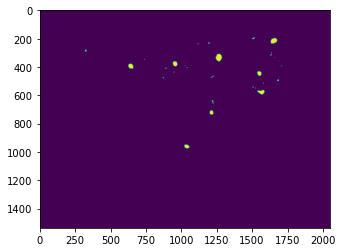

In [10]:
binary_img = cv2.cvtColor(prep.apply_CLAHE(prep.apply_med_filt(color_img)),cv2.COLOR_BGR2GRAY) < threshold[0]
plt.imshow(binary_img)

In [11]:
from PIL import Image
img = Image.fromarray(cv2.cvtColor(median_clahe, cv2.COLOR_BGR2RGB))
img.save('../data/demo pictures/filtering_step.jpg','JPEG')

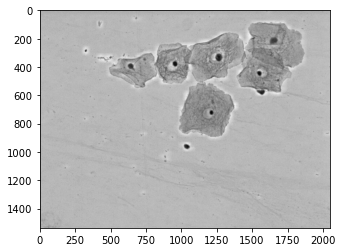

In [12]:
plt.imshow(cv2.cvtColor(clahe_img, cv2.COLOR_BGR2GRAY),cmap='gray')

In [13]:
# plt.imshow(cv2.cvtColor(clahe_img, cv2.COLOR_BGR2RGB))
img = Image.fromarray(cv2.cvtColor(clahe_img, cv2.COLOR_BGR2RGB))
img.save('../data/demo pictures/filtering_step_color.jpg','JPEG')

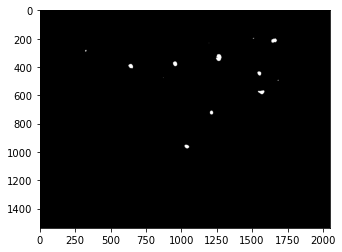

In [14]:
threshold = filters.threshold_minimum(cv2.cvtColor(median_clahe, cv2.COLOR_BGR2GRAY))
binary_img = cv2.cvtColor(median_clahe, cv2.COLOR_BGR2GRAY) < threshold
plt.imshow(binary_img,cmap='gray')
plt.savefig('../data/demo pictures/binary_mask.svg',format='svg')

In [15]:
from nuclei_segmentation_opencv import nuclei_segmenter
seg = nuclei_segmenter(solidity_threshold=0.6)

In [16]:
nuclei_df = seg.segment_nuclei(img_path1)

In [17]:
color_img = prep.read_img(img_path1)
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

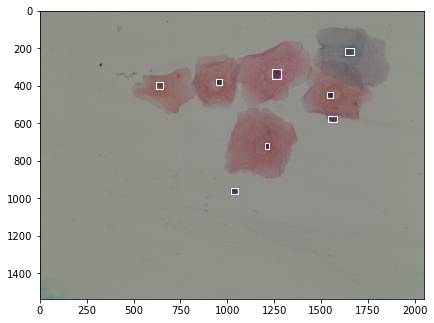

In [18]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.imshow(color_img)
for i in range(len(nuclei_df)):
    rect = plt.Rectangle((nuclei_df.iloc[i]['bbox-1'],nuclei_df.iloc[i]['bbox-0']),nuclei_df.iloc[i]['bbox-3']-nuclei_df.iloc[i]['bbox-1'],nuclei_df.iloc[i]['bbox-2']-nuclei_df.iloc[i]['bbox-0'],fill=False,color='w')
    ax.add_patch(rect)

plt.savefig('../data/demo pictures/labeled_nuclei.svg',format='svg')